In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(X,w)+b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

In [3]:
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [4]:
print('features:',features[0],'labels:',labels[0])

features: tensor([ 0.2819, -1.1372]) labels: tensor([8.6516])


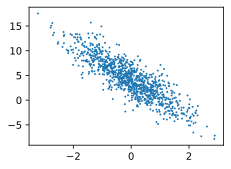

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [6]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    #随机读取样本
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size,
                          num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [7]:
batch_size=10
for X, y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-0.6085,  0.0734],
        [ 0.4792, -0.0029],
        [-1.6915,  1.4987],
        [ 0.7280,  0.2044],
        [-0.1071, -2.7024],
        [ 0.6749,  0.4631],
        [-0.7521,  0.5949],
        [-1.9598,  1.2344],
        [-0.7641,  2.8908],
        [-0.6620,  1.0356]]) 
 tensor([[ 2.7252],
        [ 5.1789],
        [-4.2676],
        [ 4.9703],
        [13.1631],
        [ 3.9589],
        [ 0.6730],
        [-3.9254],
        [-7.1667],
        [-0.6497]])


### 初始化模型参数

In [8]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

### 定义模型

In [9]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

### 定义损失函数

In [10]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

### 定义优化算法

In [11]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -=lr*param.grad/batch_size
            param.grad.zero_()

### 训练

In [12]:
lr = 0.03
num_epochs =3
net = linreg
loss = squared_loss

In [13]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)#X和y的小批量损失
        #因为l形状是(batch_size,1)，而不是标量。l中的所有元素被加到一起，并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l =loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss{float (train_l.mean()):f}')

epoch 1, loss0.029813
epoch 2, loss0.000102
epoch 3, loss0.000052


### 评估

In [14]:
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

w的估计误差：tensor([0.0004, 0.0008], grad_fn=<SubBackward0>)
b的估计误差：tensor([-9.9659e-05], grad_fn=<RsubBackward1>)
